In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage.morphology import disk
from skimage import data, filters
from ipywidgets import widgets
from scipy.ndimage import convolve
%matplotlib inline

In [2]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

# Imagem preta e branca

/home/yuri/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


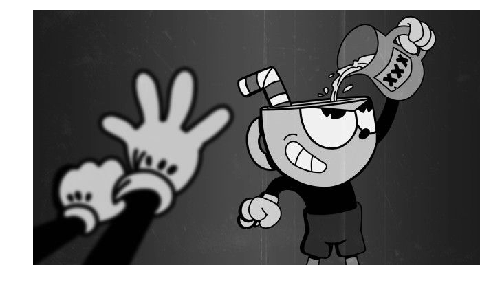

In [3]:
from skimage import img_as_ubyte
from skimage import data

image = img_as_ubyte(skic.rgb2gray(skimage.io.imread('cuphead.jpg')))
show(image)



## Media

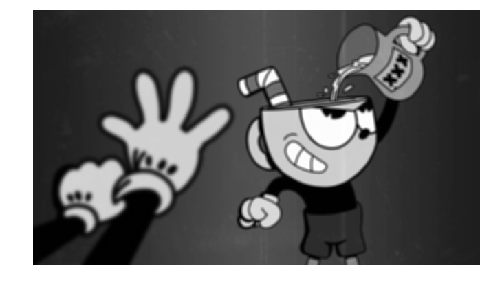

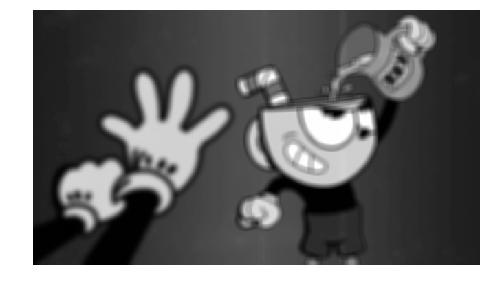

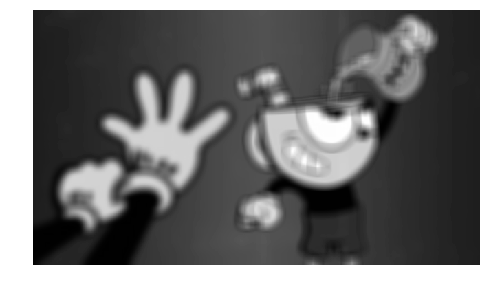

In [4]:
for i in range(5, 16, 5):
    mean_kernel = np.ones((i, i), dtype=float)
    mean_kernel /= mean_kernel.size
    mean_response = convolve(image, mean_kernel)
    show(mean_response)

## Mediana

Utilizando filtros de disco com raios $5, 10, 15$.

5


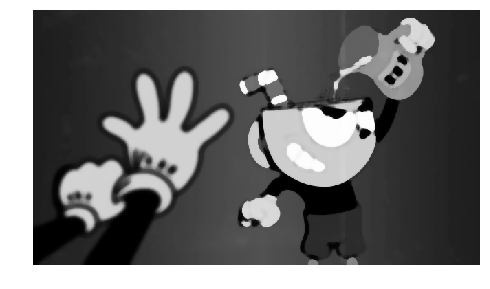

10


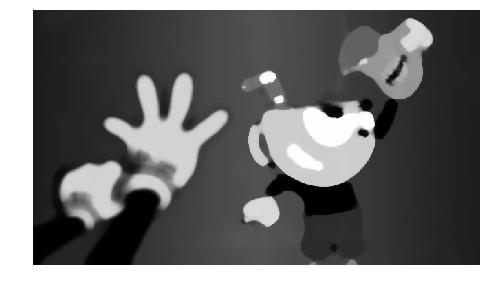

15


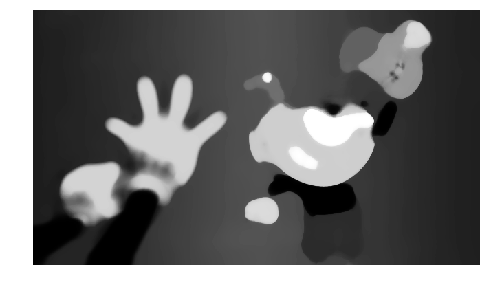

In [5]:
for i in range(5,16, 5):
    print(i)
    show(skif.rank.median(image, disk(i)))

## Bordas horizontais

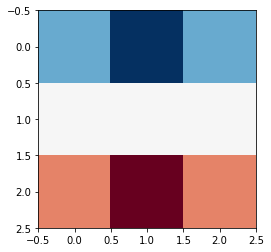

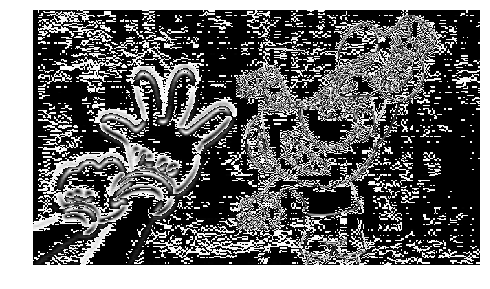

In [7]:
horizontal_edge_kernel = np.array([[ 1,  2,  1],
                                   [ 0,  0,  0],
                                   [-1, -2, -1]])
plt.imshow(horizontal_edge_kernel, cmap=plt.cm.RdBu);
edge_response = convolve(image, horizontal_edge_kernel)
show(edge_response)


## Bordas verticais

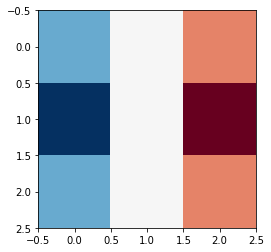

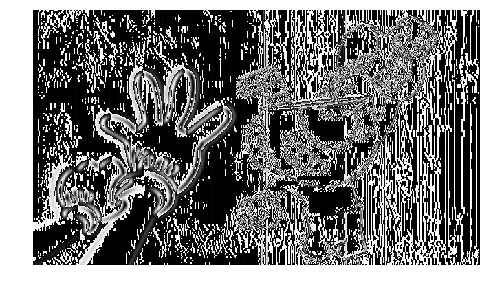

In [8]:
vertical_edge_kernel = np.array([[1, 0, -1],
                                 [2, 0, -2],
                                 [1, 0, -1]])
plt.imshow(vertical_edge_kernel, cmap=plt.cm.RdBu);
edge_response = convolve(image, vertical_edge_kernel)
show(edge_response)

## Sobel

In [9]:
@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(skif.sobel(image) < x)    

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _dom_classes=('widget-interact',))

## Roberts

In [10]:
@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(skif.roberts(image) < x)

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _dom_classes=('widget-interact',))

## Prewitt

In [11]:
@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(skif.prewitt(image) < x)    

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _dom_classes=('widget-interact',))

O que mudou ao alterar o tamanho dos kernels?  

> Aumenta a intensidade da aplicação do filtro.
> - Na média aumentar a intensidade do borrão da imagem
> - Na mediana torna as regiões mais homogeneas

# Imagem colorida

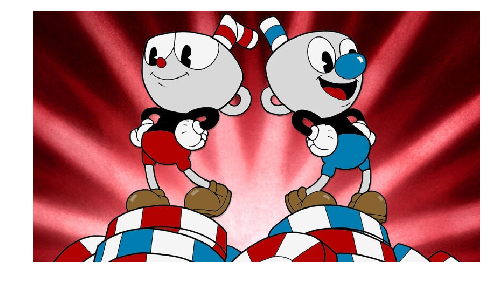

In [12]:
img_color = skimage.io.imread('cuphead_color.jpg')
show(img_color)

## Combinação de filtros

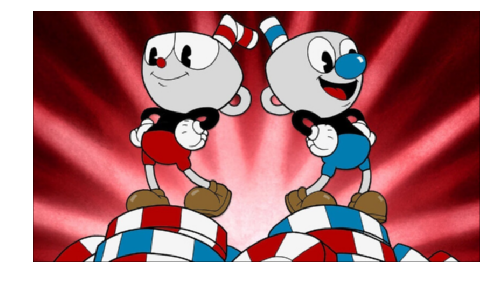

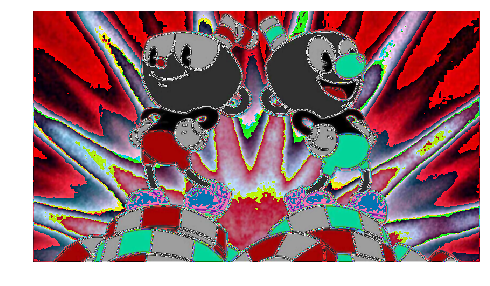

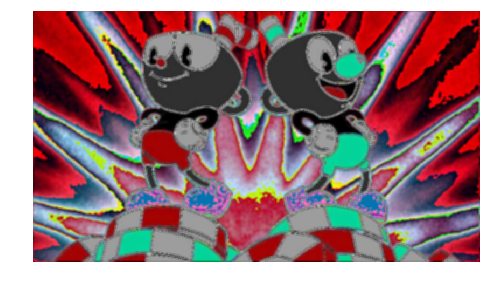

In [13]:
#filtro media 3x3
mean_kernel = np.ones((3, 3, 1), dtype=float)
mean_kernel /= mean_kernel.size
mean_response = convolve(img_color, mean_kernel, mode='constant', cval=0.0)
show(mean_response)

#filtro aleatorio 3x2
random_kernel = np.random.rand(3, 2, 1)
random_response = convolve(mean_response, random_kernel)
show(random_response)

#filtro media 5x5
mean_kernel = np.ones((5, 5, 1), dtype=float)
mean_kernel /= mean_kernel.size
mean_response = convolve(random_response, mean_kernel)
show(mean_response)

## Adicionando ruído a imagem

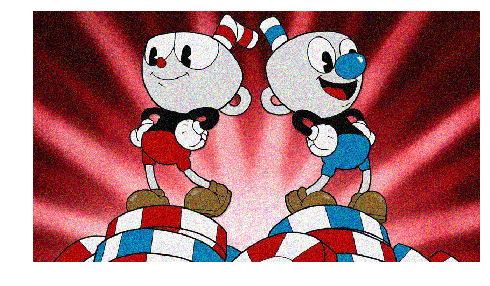

In [14]:
img_n = sku.random_noise(img_color)
show(img_n)

## Removendo ruído

Foi utilizado o filtro da média em dimensões diferentes para encontrar o melhor resultado

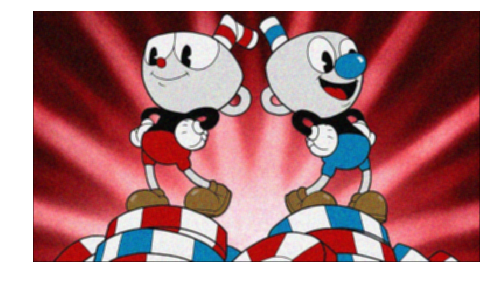

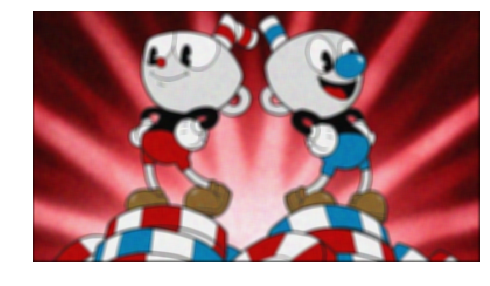

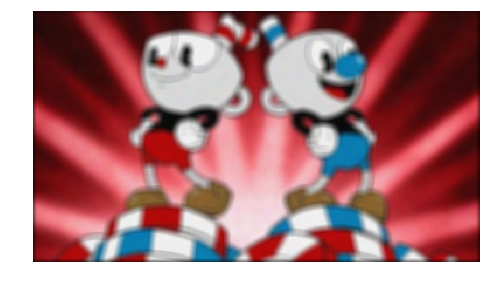

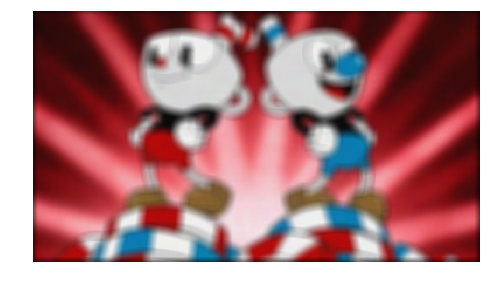

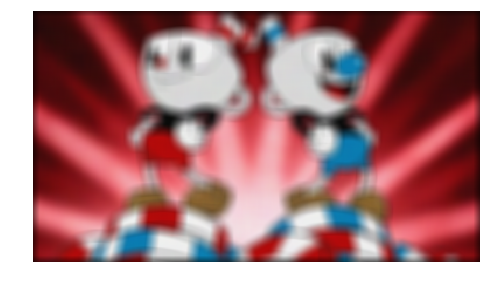

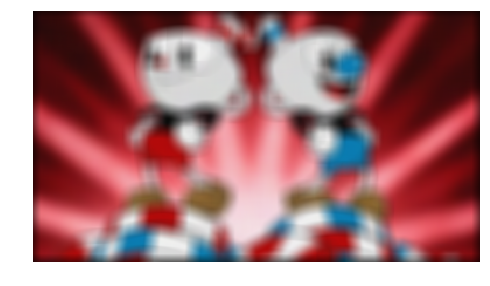

In [15]:
for i in range(5, 31, 5):
    mean_kernel = np.ones((i, i, 1))
    mean_kernel /= mean_kernel.size
    mean_response = convolve(img_n, mean_kernel, mode='constant', cval=0.0)
    show(mean_response)